<a href="https://colab.research.google.com/github/KaterynaRovinska/Study-practice/blob/main/EDA_%26_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Dataset


This exam is about EDA and Probability and for that we will use the Pisa2018.csv dataset, which is a subset for 4 countries of the 2018 PISA report. The country codes are:

France, code "FRA", 
Germany, code "DEU", 
Italy, code "ITA", 
Spain, code "ESP"

The OECD Programme for International Student Assessment (PISA) examines what students know in reading, mathematics and science. This dataset provides a detailed examination of student performance in mathematics and science. Below we include a short description of the variables


CNT: Country where the student takes the test

Gender: binary variable that takes value 1 for females and 0 for males

Mothereduc: The level of education on the student's mother. This variable is discrete. A higher value implies a higher level of education.

HmwPC: binary variable that takes the value 1 if the student has a computer at home, and 0 otherwise

Books: Binary variable that takes value 1 if the student has books at home, and 0 otherwise

Cars: number of cars at the student's home.

IMM: binary variable that takes value 1 if the student was born in the same coutry where he/she took the test, 0 otherwise

LEARNMINWEEK: student's learning time in a week (in minutes)

ESCS: A continuous variable that captures the social economic and cultural status of the student. A higher value implies a higher status

EMOSUPS: A continuous variable that captures the student's emotional support from parents. A higher value implies more emotional support.

PV10MATH: A continuous variable that captures the grade of the student in the Math test

PV10SCIE: A continuous variable that captures the grade of the student in the Science test

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from google.colab import drive
drive.mount('Kateryna')

Mounted at Kateryna


In [3]:
pisa = pd.read_csv('/content/Kateryna/MyDrive/IEXL - Feb PT 2023 Rovinska/Data Sets/Pisa2018.csv')
pisa.head(3)

,Unnamed: 0,CNT,Gender,Mothereduc,HmwPC,Books,Cars,IMM,LEARNMINWEEK,ESCS,EMOSUPS,PV10MATH,PV10SCIE
0,1,FRA,1,2,1,1,2,1,2280,5.6608,1.3649,359.898,472.360
1,2,FRA,0,2,1,1,3,1,1540,5.0190,3.4518,434.867,397.313
2,3,FRA,1,2,1,1,2,1,2025,6.5320,3.6637,581.459,632.093


In [4]:
#country with the largest representation is (ESP/ITA/DEU/FRA) 

pisa.CNT.value_counts()

ESP    20442
ITA     7918
FRA     3635
DEU     1903
Name: CNT, dtype: int64

# Joint Distribution

Let's focus on the Spanish students with books at home. Then find the crosstab with relative frequencies between the variables IMM and HmwPC

In [5]:
#crosstab with relative frequencies of the binary variables IMM and HmwPC for spanish students with books at home

esp_st_with_books = pisa[(pisa['CNT'] =='ESP') & (pisa['Books']== 1)]

crosstab = pd.crosstab(esp_st_with_books['IMM'], esp_st_with_books['HmwPC'], normalize = True).round(3)

print(crosstab)

HmwPC      0      1
IMM                
0      0.009  0.067
1      0.042  0.883


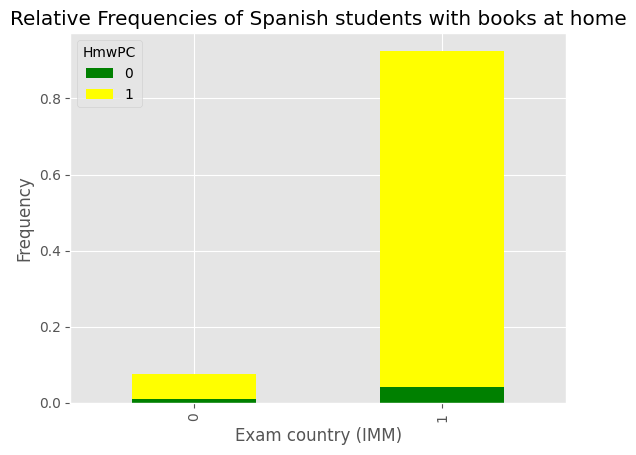

In [8]:
from matplotlib.cm import colors
crosstab = pd.crosstab(esp_st_with_books['IMM'], esp_st_with_books['HmwPC'], normalize = True).round(3)

# create a clustered bar
crosstab.plot(kind='bar', stacked = True, color = ("green",'yellow'))

# set the axis labels and title
plt.xlabel('Exam country (IMM)')
plt.ylabel('Frequency')
plt.title('Relative Frequencies of Spanish students with books at home')

# show the plot
plt.show()

This crosstab shows the joint frequencies of the binary variables HmwPC (student has a computer at home) and IMM (student was born in the same country where he/she took the test) for students in Spain. 

The values in the table represent the proportion of students who fall into each combination.

0.009 for HmwPC = 0 and IMM = 0: This means that 0.9% of the students in the group do not have a computer at home and were not born in the same country where they took the test.

0.042 for HmwPC = 0 and IMM = 1: This means that 4.2% of the students in the group do not have a computer at home but were born in the same country where they took the test.

0.067 for HmwPC = 1 and IMM = 0: This means that 6.7% of the students in the group have a computer at home but were not born in the same country where they took the test.

0.883 for HmwPC = 1 and IMM = 1: This means that 88.3% of the students in the group have a computer at home and were born in the same country where they took the test. 

Stacked bar chart shows the distribution of each category across the levels of the other variable, and the overall proportion for each variable.

The most common type of student are those who took the exam in the same country they were born in and have a computer at home.

# Study Time

Now we want to analyse the distributions of minutes of study per week. For that we are going to consider those students with books at home, with computer at home and who take the exam in the same country the were born in. Now consider German and French students grouped by gender.

In [10]:
#Analyzing distributions of the minutes that the students studied weekly (DEU & FRA)

#students with books and computers at home who took the exam in the same country they were born in
students = pisa[(pisa['Books'] == 1) & (pisa['HmwPC'] ==1) & (pisa['IMM']==1)]

# Descriptive
des = students.groupby(['CNT', 'Gender'])['LEARNMINWEEK'].describe().loc[['DEU', 'FRA']]
des['skewness'] = students.groupby(['CNT', 'Gender'])['LEARNMINWEEK'].skew()
des['kurtosis'] = students.groupby(['CNT', 'Gender']).apply(pd.DataFrame.kurt)['LEARNMINWEEK']
des

<ipython-input-10-64127def1d56>:10: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  des['kurtosis'] = students.groupby(['CNT', 'Gender']).apply(pd.DataFrame.kurt)['LEARNMINWEEK']
<ipython-input-10-64127def1d56>:10: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  des['kurtosis'] = students.groupby(['CNT', 'Gender']).apply(pd.DataFrame.kurt)['LEARNMINWEEK']
<ipython-input-10-64127def1d56>:10: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, spec

count         mean         std    min      25%     50%     75%  \
CNT Gender                                                                    
DEU 0        771.0  1575.745785  313.879984  440.0  1395.00  1530.0  1620.0   
    1        772.0  1587.474093  321.130611  390.0  1395.00  1575.0  1665.0   
FRA 0       1322.0  1654.950832  450.473989  100.0  1396.25  1650.0  1925.0   
    1       1492.0  1655.566354  459.598684  270.0  1375.00  1650.0  1925.0   

               max  skewness  kurtosis  
CNT Gender                              
DEU 0       3000.0  1.792434  5.932034  
    1       3000.0  1.643507  5.721440  
FRA 0       3000.0 -0.006184  0.685224  
    1       3000.0  0.103762  0.478235

In [13]:
cv = pd.DataFrame({'cv': des['std']/des['mean']})
cv

cv
CNT Gender          
DEU 0       0.199195
    1       0.202290
FRA 0       0.272198
    1       0.277608

The population with the largest variability is that of French Females, then let's represent its histogram and boxplot

<ipython-input-15-55f933e6d2ff>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.random.normal(1, 0.02, size=students[(students['Gender'] == 1) & (students['CNT'] == 'FRA')]['LEARNMINWEEK'].shape[0]),


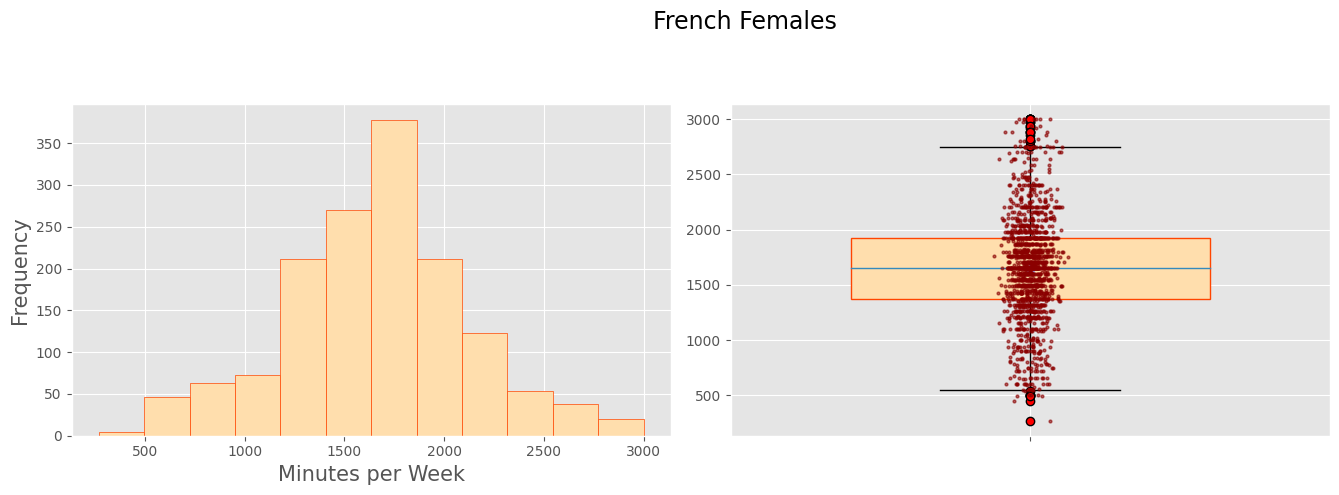

In [15]:
plt.figure(figsize = (15,5))

plt.suptitle('French Females', fontsize = 17)
plt.subplot(1,2,1)
plt.hist(students[(students['Gender'] == 1) & (students['CNT'] == 'FRA')]['LEARNMINWEEK'],
         bins = 'sturges',
         color = 'navajowhite',
         ec = 'orangered')
plt.xlabel('Minutes per Week', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.subplot(1,2,2)
plt.boxplot(students[(students['Gender'] == 1) & (students['CNT'] == 'FRA')]['LEARNMINWEEK'],
            widths = 0.6,
            showmeans = True,
            patch_artist = True,
            boxprops = {'facecolor': 'navajowhite',
                        'color': 'orangered'},
            flierprops = {'marker': 'o',
                          'markerfacecolor': 'red'},
            labels = [''])
plt.plot(np.random.normal(1, 0.02, size=students[(students['Gender'] == 1) & (students['CNT'] == 'FRA')]['LEARNMINWEEK'].shape[0]), 
         students[(students['Gender'] == 1) & (students['CNT'] == 'FRA')]['LEARNMINWEEK'], 
         'r.', alpha=0.6, markersize = 4,
         color = 'darkred',
         zorder = 10)

plt.tight_layout(rect = (0,0,0.9,0.9))
plt.show()

From the histogram, we can see that the distribution is symmetric because the skewness value (0.104) is very close to zero and this is refected in the fact that both, mean and median are very close, on the other hand we see a number of outliers.

In [16]:
ff_IQR = des.loc['FRA','75%'][1] - des.loc['FRA','25%'][1]
upper_tuk = des.loc['FRA','75%'][1] + 1.5*ff_IQR
lower_tuk = des.loc['FRA','25%'][1] - 1.5*ff_IQR

n_outliers = students[(students['Gender'] == 1) & (students['CNT'] == 'FRA') & ((students['LEARNMINWEEK'] > upper_tuk) | (students['LEARNMINWEEK'] < lower_tuk))].shape[0]
n = students[(students['Gender'] == 1) & (students['CNT'] == 'FRA')].shape[0]

print(f'The number of outliers is {n_outliers:2d} out of {n:4d} students')

The number of outliers is 31 out of 1492 students


---

### <font color = "darkgreen"> Parents Support </font>

Let's focus now in understanding the effect of the parents support in the grades of the students. For that choose from the same subset as in the last question the German students.

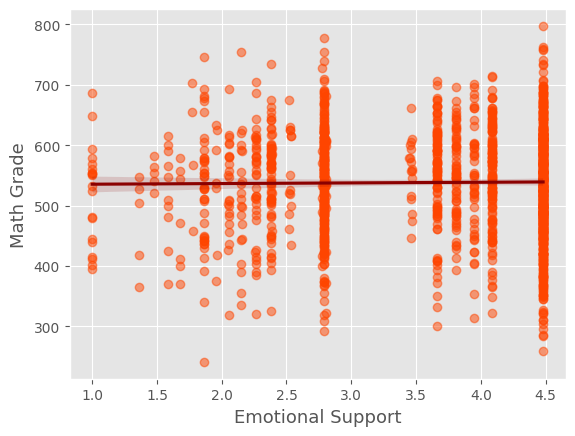

In [17]:
sns.regplot(x = 'EMOSUPS',
           y = 'PV10MATH',
           data = students[students['CNT'] == 'DEU'],
           scatter_kws = {'color' : 'orangered', 'alpha': 0.5},
           line_kws = {'color': 'darkred'})
plt.xlabel('Emotional Support', fontsize = 13)
plt.ylabel('Math Grade', fontsize = 13)
plt.show()

In [19]:
# covariance and of the square of the linear correlation coefficient of the parents support and the grades in mathematics of the German students
students[students['CNT'] == 'DEU'][['EMOSUPS', 'PV10MATH']].cov()

,EMOSUPS,PV10MATH
EMOSUPS,0.915982,0.978886
PV10MATH,0.978886,7447.527464


In [20]:
#the square of the linear correlation coefficient
students[students['CNT'] == 'DEU'][['EMOSUPS', 'PV10MATH']].corr()**2

,EMOSUPS,PV10MATH
EMOSUPS,1.00000,0.00014
PV10MATH,0.00014,1.00000


Association: covariance ( ≈0.98 ) implies that there exists some kind of positive linear dependendence between the variables, i.e. when the emotional support increases, the grade in math increases too. 

Correlation: we use linear correlation coefficient square to determine the strength of the association. In this case, the magnitude is 0.00014, which implies that we can explain the 0.014% of the variability in the grades of math by just using the emotional support. This is the same as saying that the emotional support does not have any impact on the grades. This may imply that there exists some kind of non-linear dependence between the variables, but given the scatterplot we see that, in fact, there is no dependence.

# Probability
Suppose that we select randomly one student from our sample. then:

The probability that she is Spanish, with books and computer at home, took the exam in the same country whe was born in and is female is...
Among the Spanish students with books and computers at home, find if the probability that they obtained a high grade in mathematics is independent of taking the exam in the same country they were born in

In [ ]:
# The probability of picking a Spanish female with books and computer at home and took the exam in the same country she was born in is (in percentage with two decimal numbers) from our sample

#Only Spanish female students with books and a computer at home who took the exam in the same country they were born in
spanish_f = pisa[(pisa['CNT'] == 'ESP') & (pisa['Gender'] == 1) & (pisa['Books'] == 1) & (pisa['HmwPC'] == 1) & (pisa['IMM'] == 1)]

# Calculate the probability
prob = len(spanish_f) / len(pisa)

# Round the probability to two decimal places
prob_rounded = round(prob * 100,2)

print(prob_rounded)

21.21


In [ ]:
'''
Among the Spanish students with books and computers at home, the probability that they obtained a high grade in mathematics 
is independent of taking the exam in the same country they were born in (two decimal numbers in percentage)
'''

#Only Spanish students with books and a computer at home who took the exam in the same country they were born in
ESP_stud_IMM1 = pisa[(pisa['CNT'] == 'ESP') & (pisa['Books'] == 1) & (pisa['HmwPC'] == 1) & (pisa['IMM'] == 1)]

#Only Spanish students with books and a computer at home 
ESP_stud = pisa[(pisa['CNT'] == 'ESP') & (pisa['Books'] == 1) & (pisa['HmwPC'] == 1)]

# Calculating mean and std for Spanish students
mean_ESP = ESP_stud['PV10MATH'].mean()
std_ESP = ESP_stud['PV10MATH'].std()

#number of students who obtained a high grade in mathematics
high_gr=len(ESP_stud[ESP_stud['PV10MATH'] > mean_ESP + std_ESP])

# Calculate the probability of high grades for Spanish students with books and computers at home P(high) (A)
prob_high_ESP = (high_gr / len(ESP_stud))*100
print(f'The probability of high grades for Spanish students with books and computers at home is {prob_high_ESP:4.2f}')

#number of students who obtained a high grade in mathematics and were born and had exam in spain 
high_gr_IMM1=len(ESP_stud_IMM1[ESP_stud_IMM1['PV10MATH'] > mean_ESP + std_ESP])

#The probability of high grades for Spanish students with books and computers at home and exam in spain P(high|IMM=1) (B)
B = (high_gr_IMM1 / len(ESP_stud_IMM1)) * 100
print(f'The probability of high grades for Spanish students with books and computers at home and exam in spain is {B:4.2f}')


The probability of high grades for Spanish students with books and computers at home is 15.40
The probability of high grades for Spanish students with books and computers at home and exam in spain is 16.07
